# Bộ dữ liệu về bệnh tiểu đường
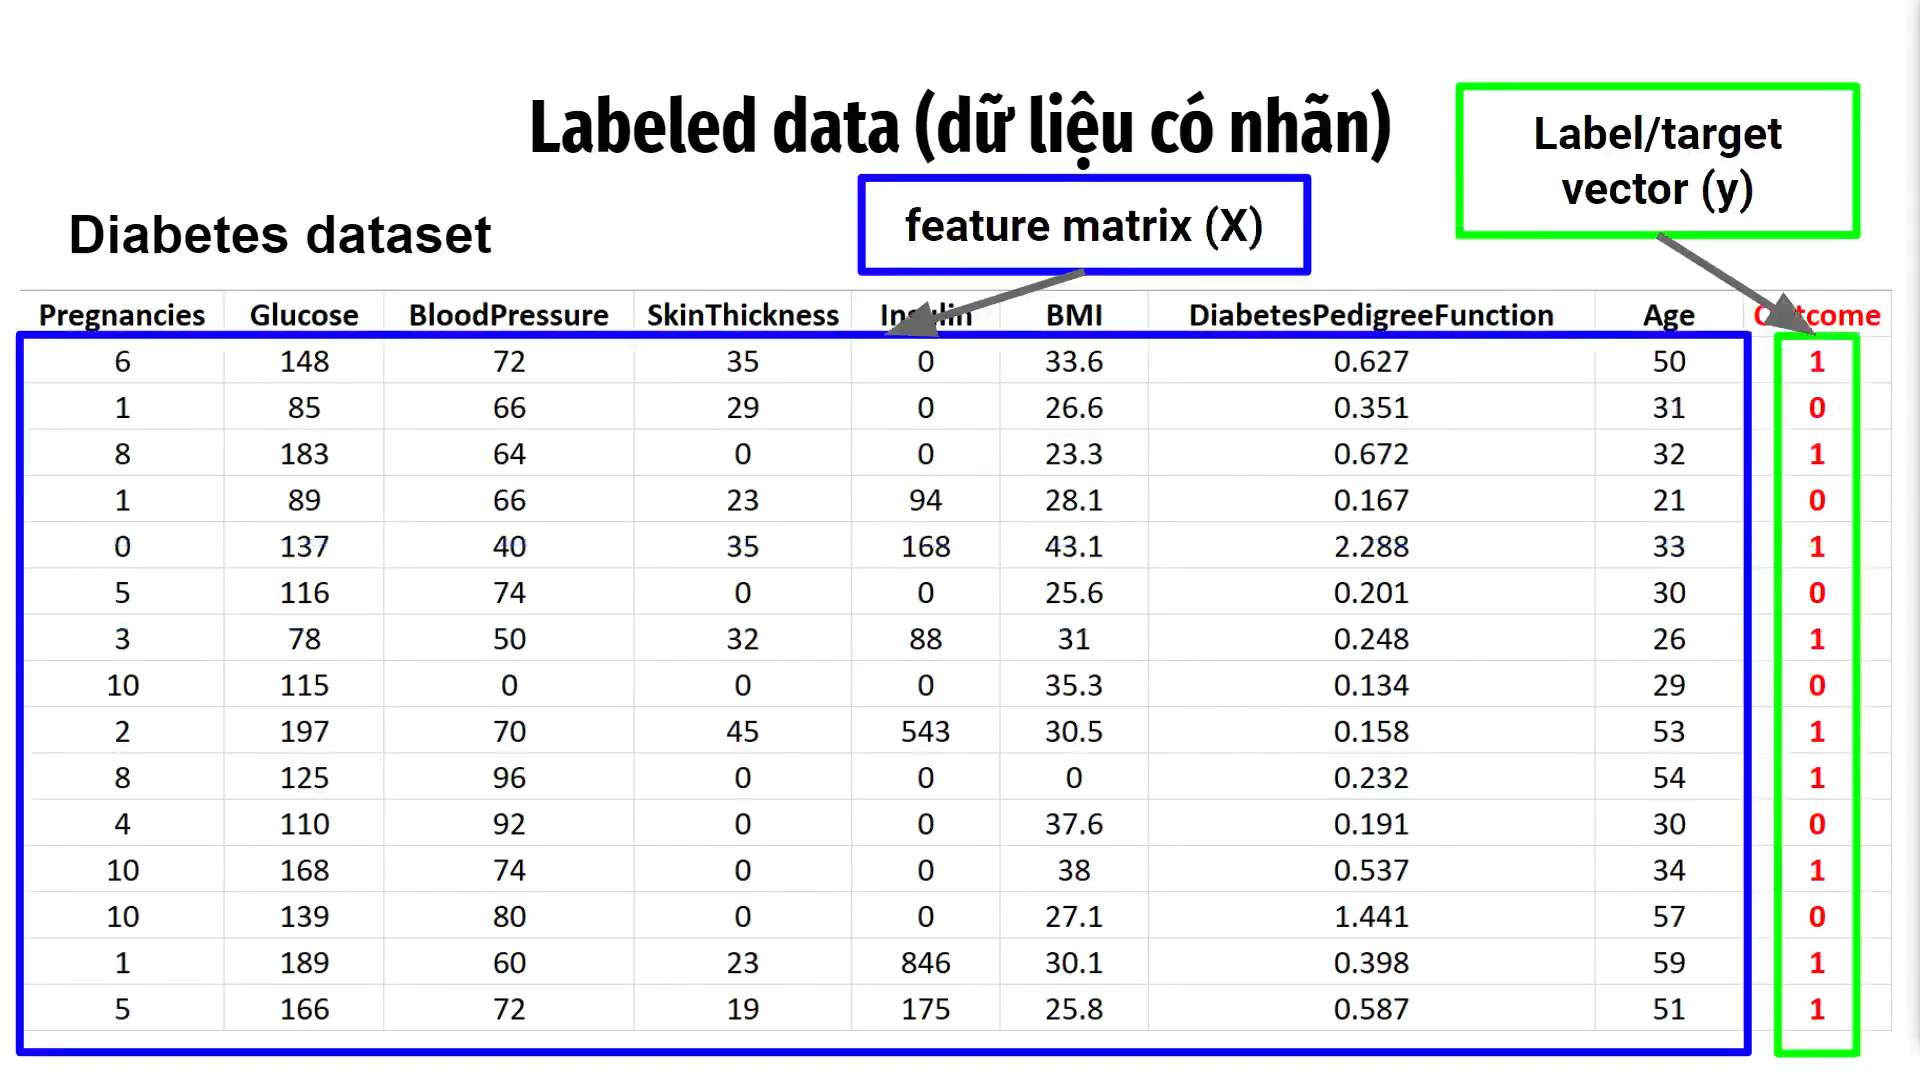

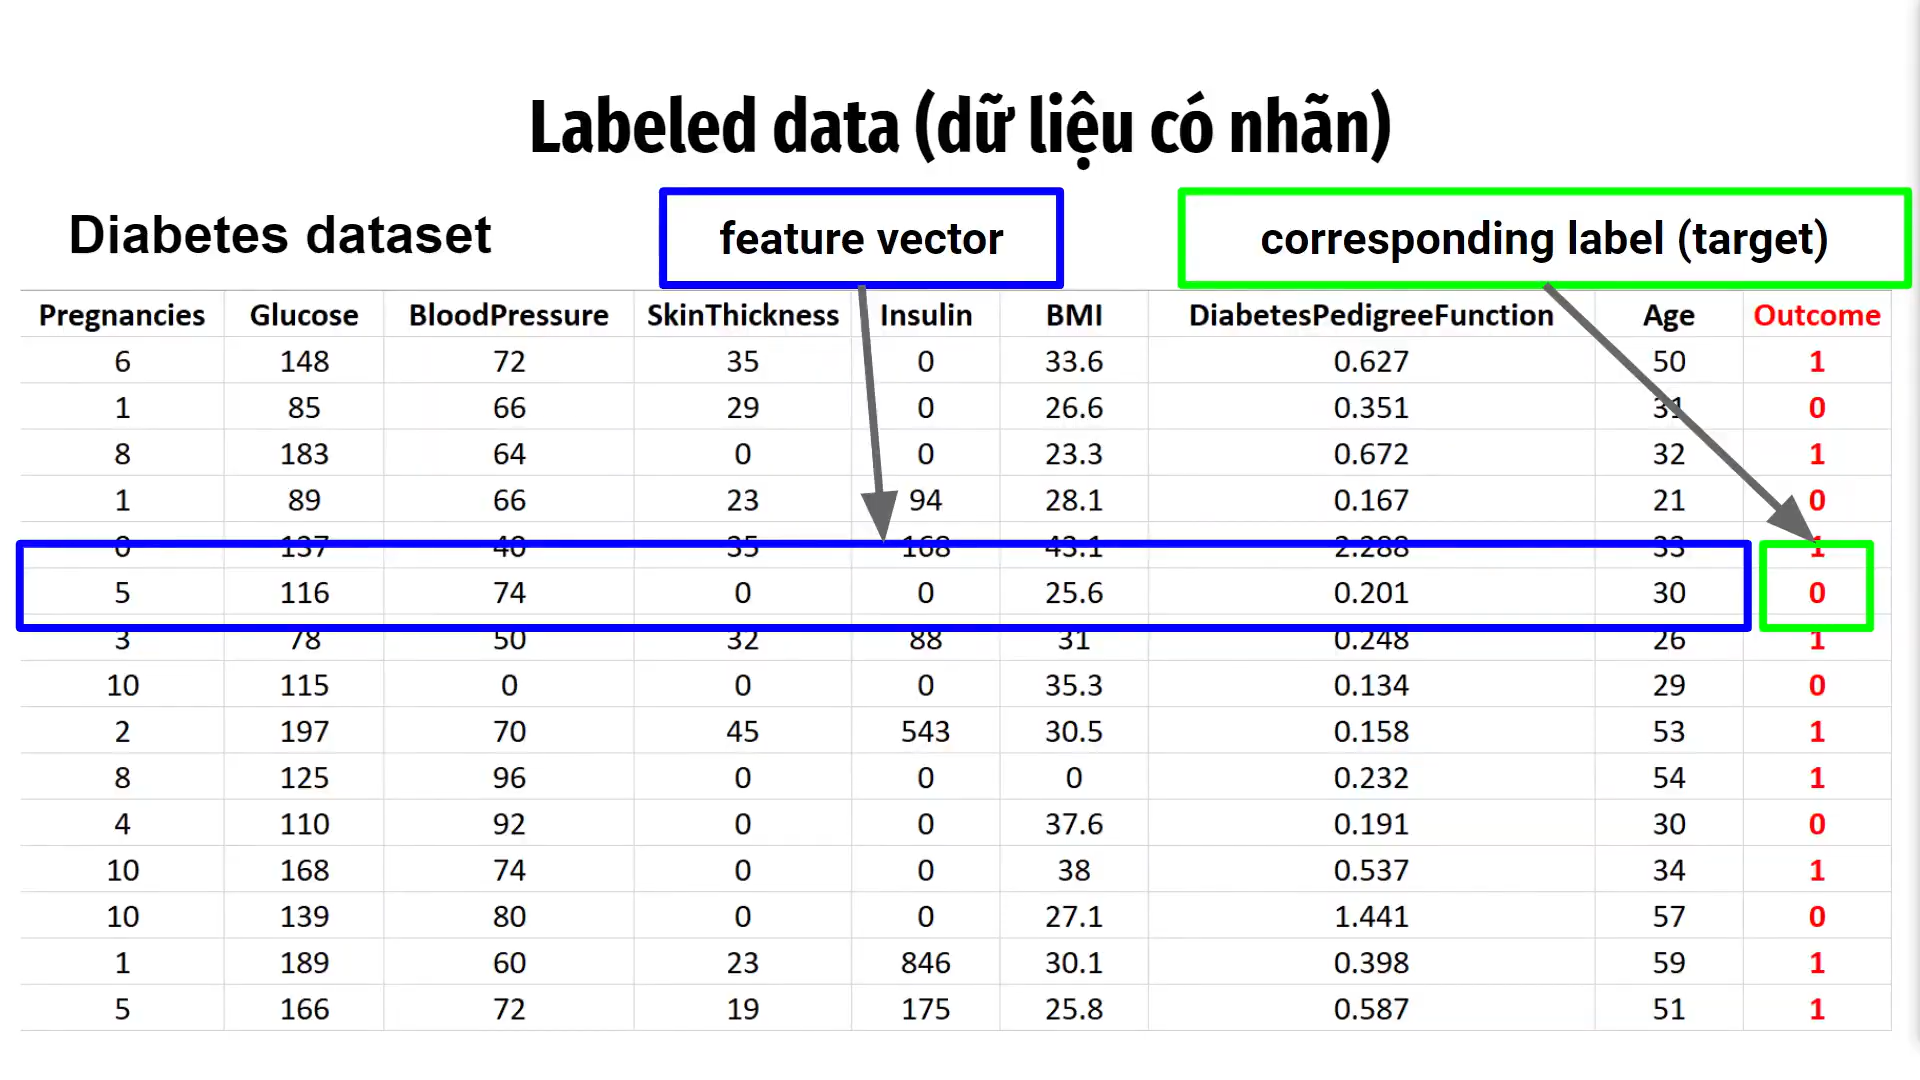

- Sample - 1 hàng - ở đây đại diện cho 1 bệnh nhân , hay 1 bản ghi (record)

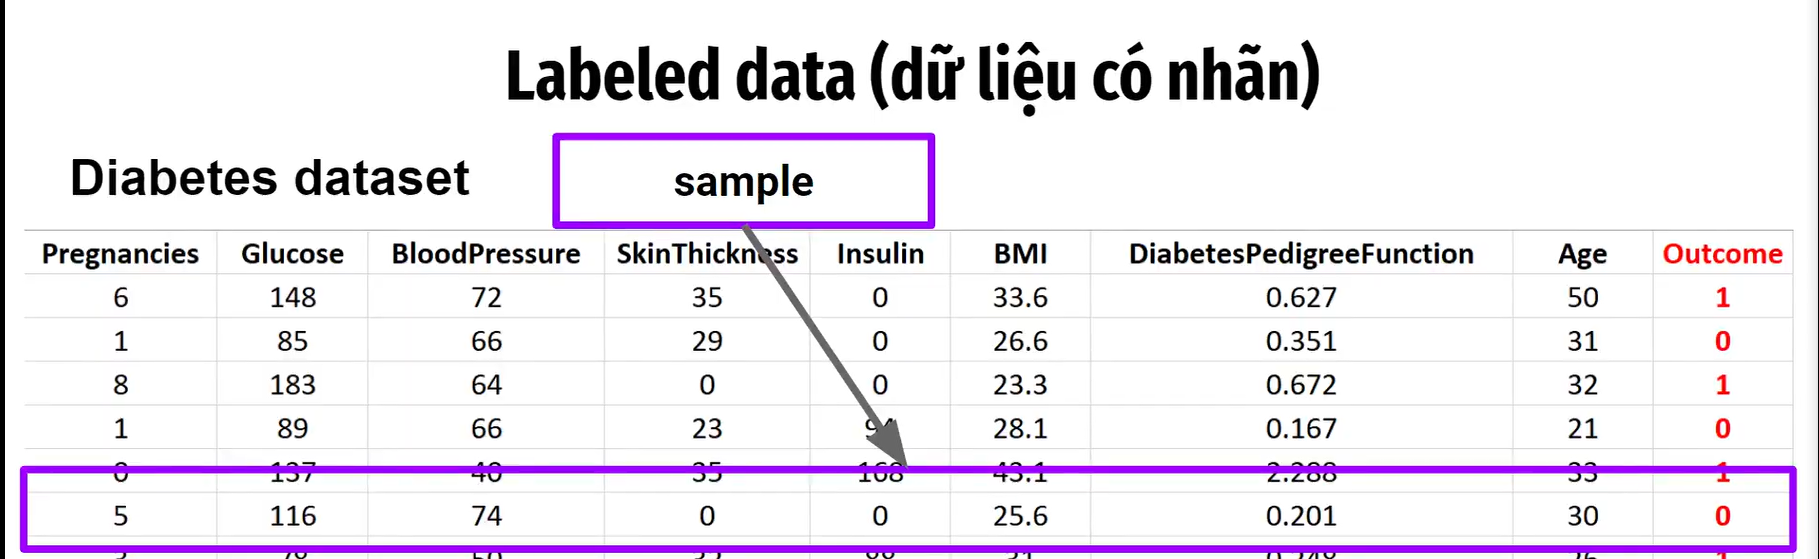

- feature : là cột dữ liệu mà không phụ thuộc vào cột nào khác  (= attribute, independed )
- label (target hay depended ) - là cột mà phụ thuộc vào cột khác để được dự đoán ra

# quá trình huấn luyện
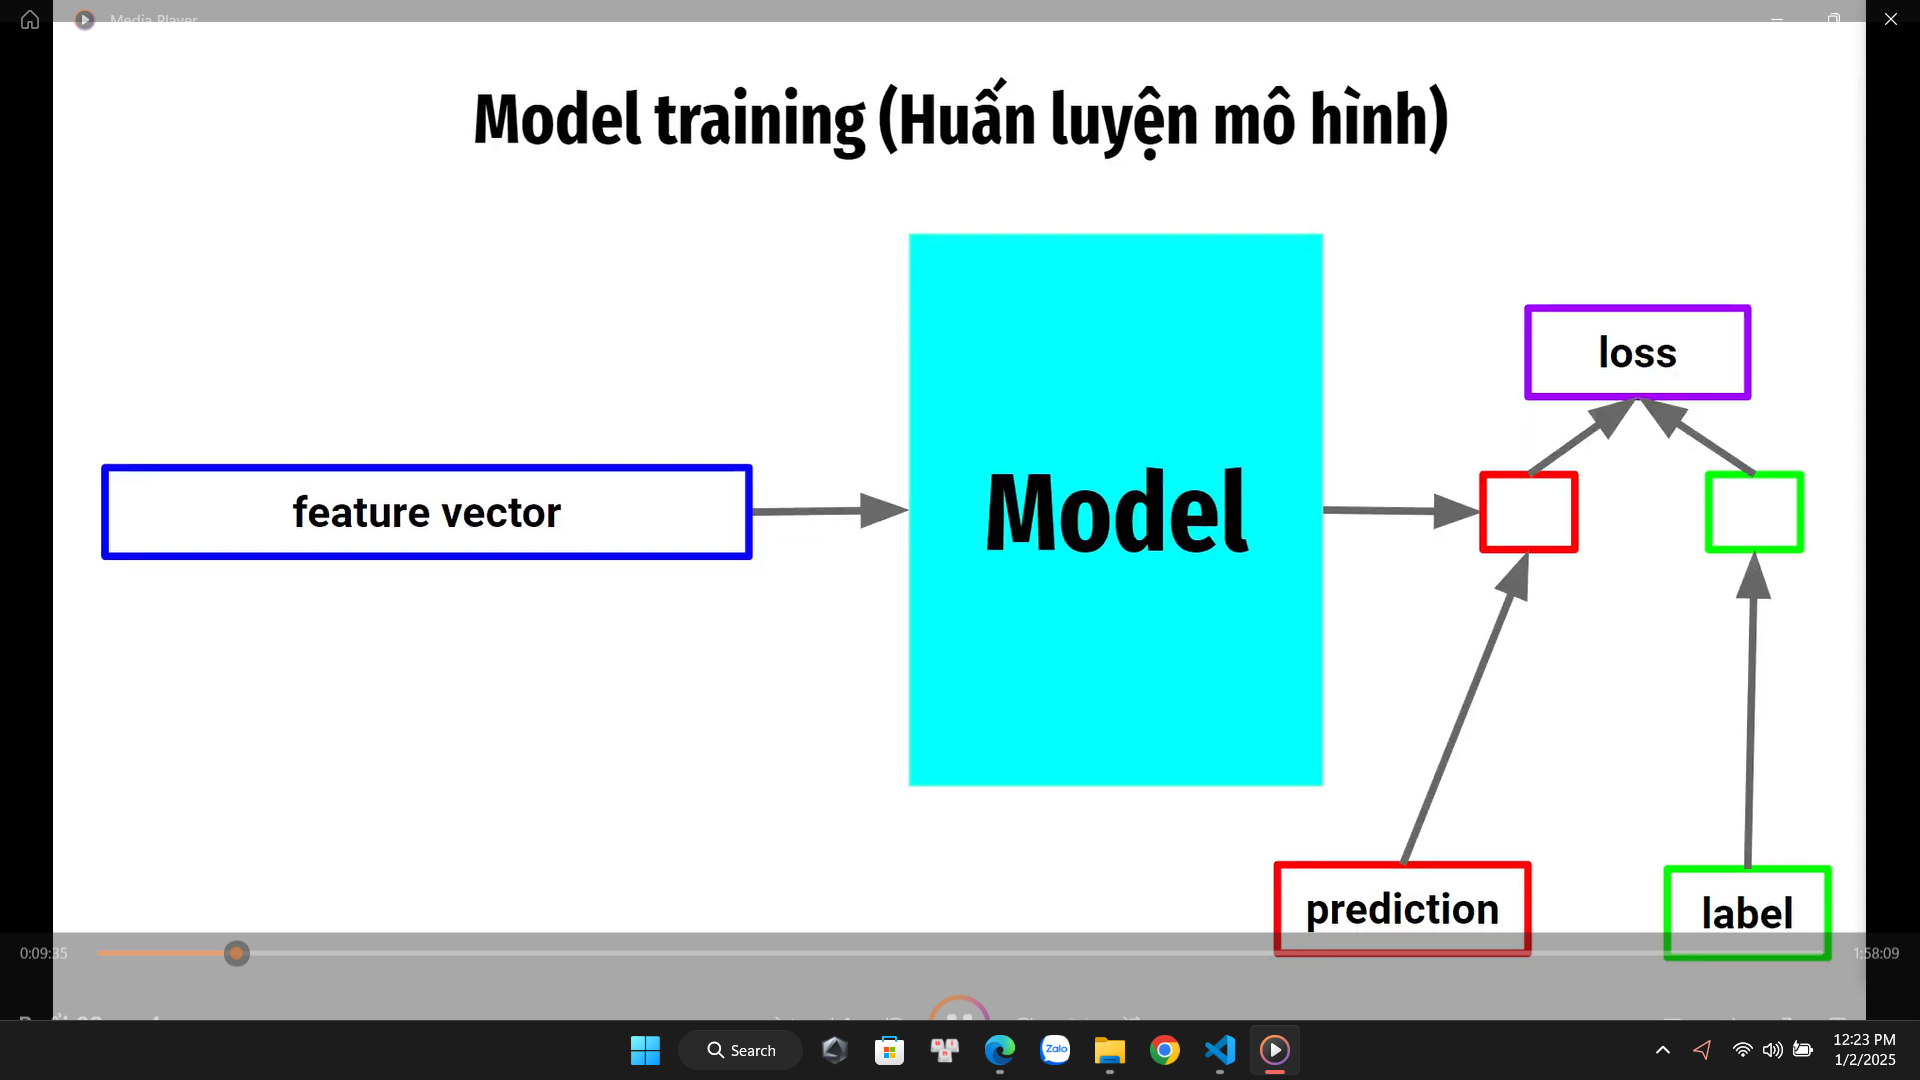

- đưa feature vector vào model - sau đó nó sẽ có kết quả predict , sau đó nó lấy predict để so sánh với label thực tế , sau đó tỉ lệ loss được cập nhật vào mô hình - loss càng nhỏ thì càng chính xác

# cách thực tế mà ngta triển khai
- thay vì làm với từng sample 1 , người ta triển khai với 1 cụm sample

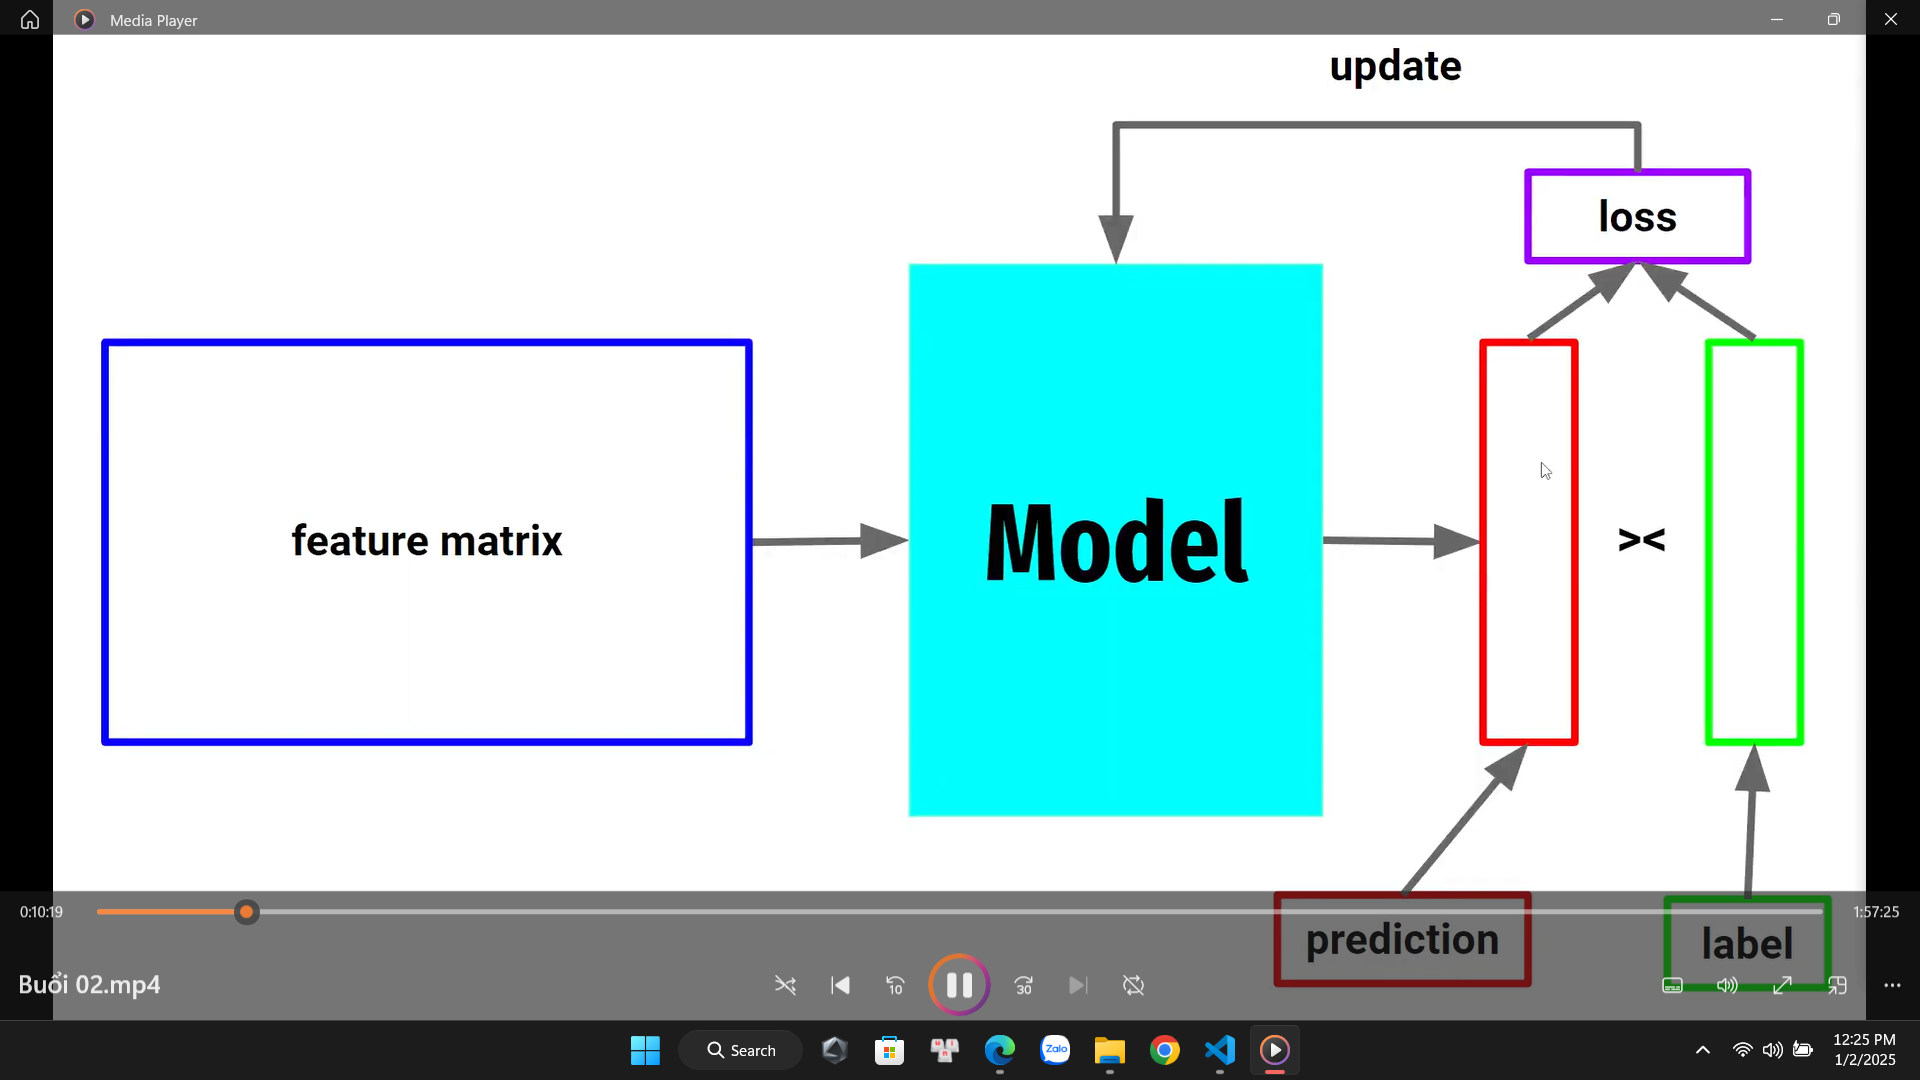

- Khi mà tính loss để tránh việc fix 1 sample thì quá bé hay với 100 sample thì quá to thì người ta sẽ tính trung bình (kiểu có 1 ô thì chỉ lấy 1 ô đó còn 100 ô thì sẽ cộng 100 ô đó lại chia trung bình)

#Hàm loss (Hàm mất mát)
- loss càng nhỏ thì càng tốt
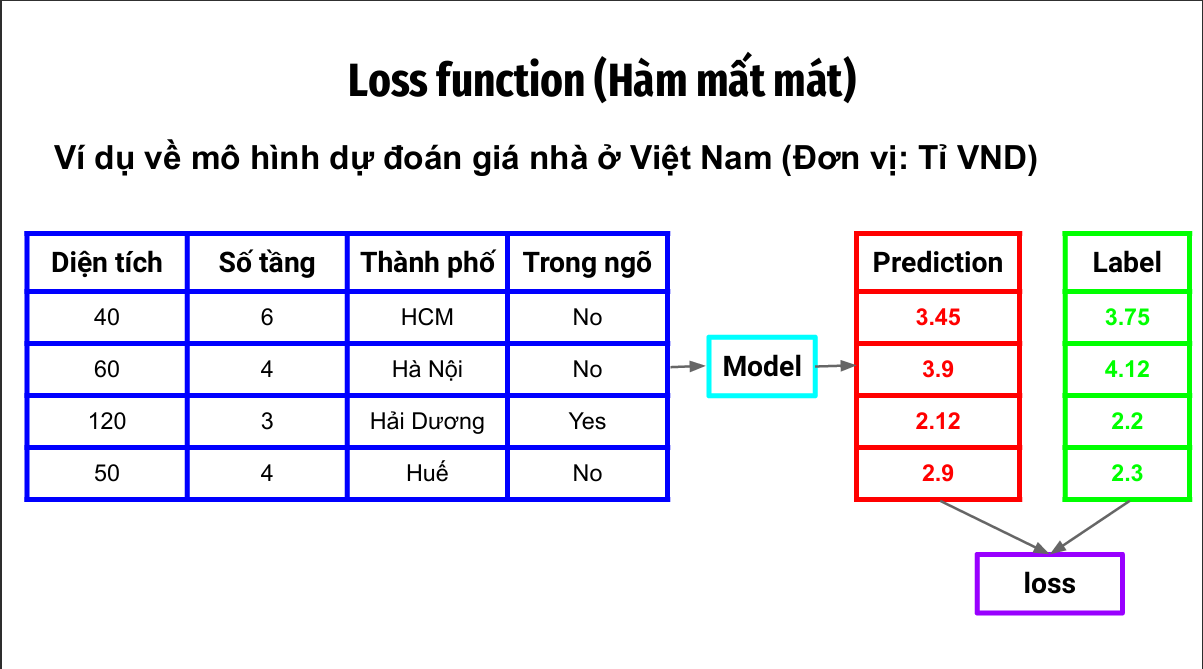

# Đối với bài toán regression - dự đoán các giá trị liên tục
- sẽ có 2 hàm loss phổ biến
- ở đây công thức đang bị thiếu - tính tổng sigma xong phải chia cho số sample nữa mới ra loss
- ở đây (chấp nhận việc model của bạn đang có các sai số)
  + khi muốn dự đoán thật chính xác chúng ta dùng l1
  + khi muốn sai số là nhỏ nhất chúng ta dùng l2 (ở trong mô hình sẽ có lúc có những điểm nằm xa hơn hẳn những điểm con lại - hay gọi là out layer - việc của l2 sẽ tập trung tính toán và nó hơn)

- ví dụ với l1 : khi bạn xây dựng model dự đoán điểm cho lớp , phổ điểm là từ 6 -> 10 nhưng lại có bạn được 0 - bạn có thể bỏ luôn mấy cái outliers đi để nó không làm ảnh hưởng đến thành tích lớp chẳng hạn

- ví dụ với l2 : nhưng đôi khi các điểm outliers lại là những điểm rất quan trọng ví dụ khi bạn xây dựng model phán đoán bệnh nhân ung thư thì những điểm outliers này chính là những bệnh nhân sẽ có khả năng bị ung thư rất cao (những ng khác sai có thể không sao còn đâu những điểm outliers này phải chính xác tuyệt đối )

- nó còn có 1 loại nữa gọi là huberLoss (khi mà sai số còn bé thì dùng l2 và ngược lại dùng l1 - hay dùng cho deep)

- còn 1 loại là lai giữa cả l1 và l2

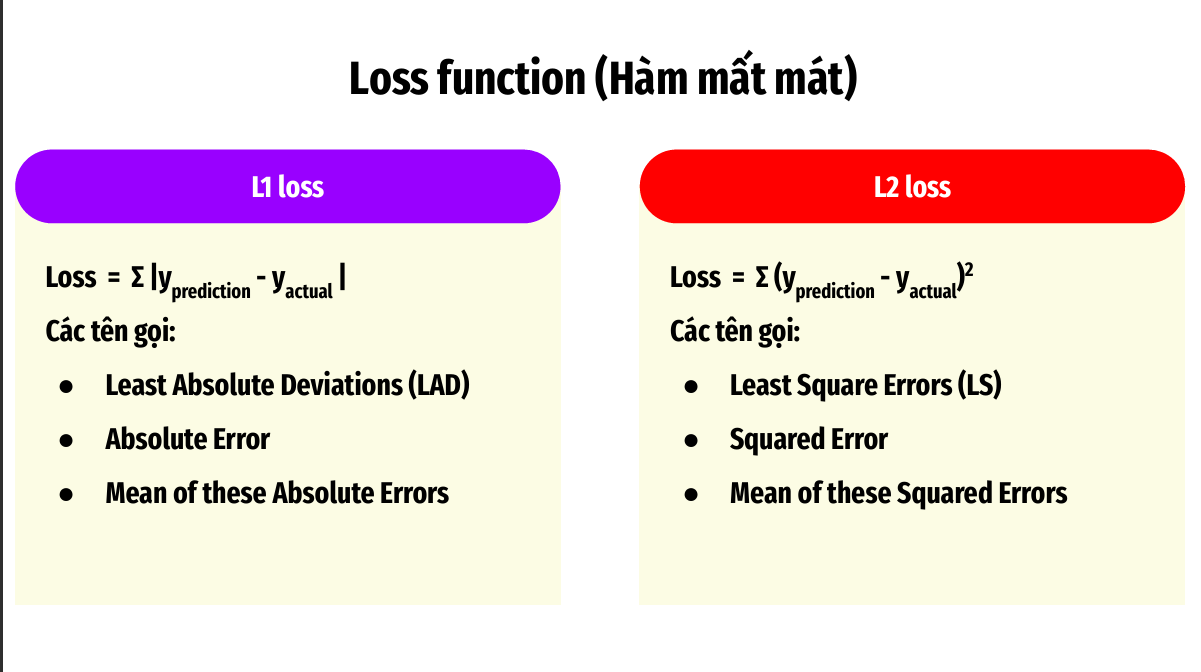

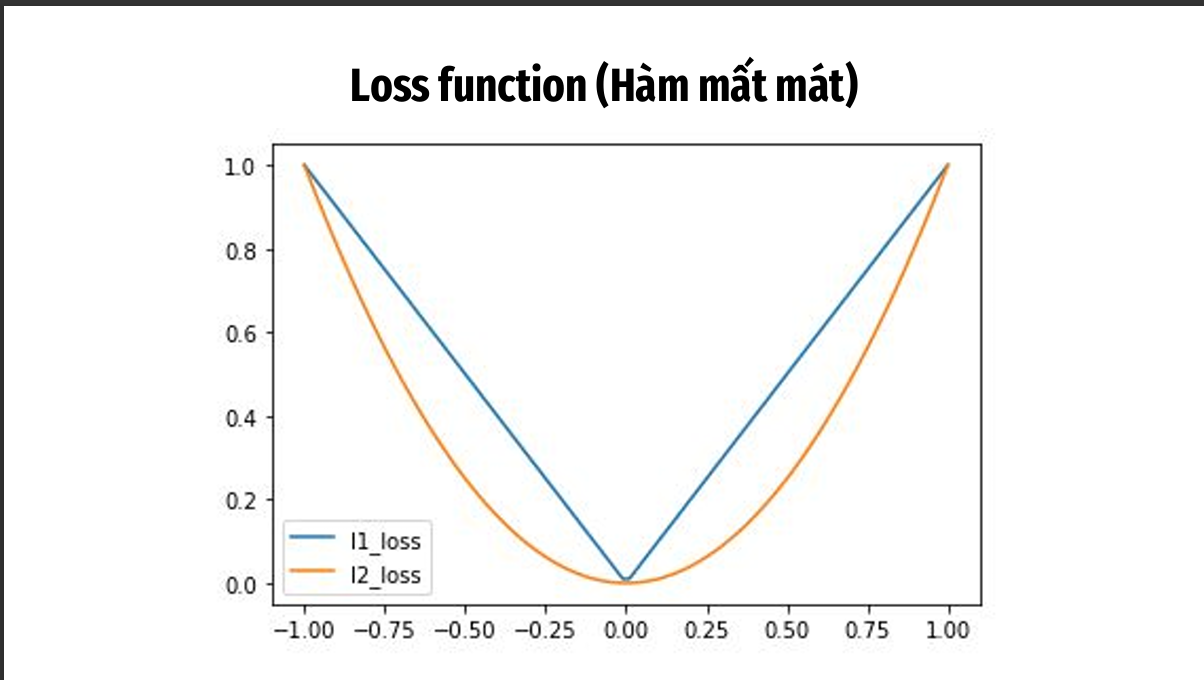

# cách chia dataset
- Khi bạn có data bạn sẽ không dùng 100 % để training mà bạn sẽ chia nó làm 3 phần
 + training set - bộ lớn nhất dùng để huấn luyện mô hình
 + validation set - trong thời gian nhất định khi huấn luyện mô hình bạn sẽ kiểm tra xem model có đang làm tốt hay không (nó giống như kiểu khi ktra ở lớp đề thi sẽ gặp những bài hơi lạ hơn)
 + test set - với các model khác nhau thì phải chung 1 bộ test (ví dụ bình thường học trên lớp - rồi ktra theo đề của giáo viên nhưng đến khi đi thi đại học thì cần phải công bằng và để xem ai tốt hơn)  - 1 khi đã động vào test set là chỉ có đem model đi triển khai thôi
 + loss sẽ được tính từ prediction và label của training set (loss trong quá trình training sẽ dược dùng để update model còn loss ở validation chỉ dùng để rate model - nó sẽ cho ta biết khi nào nên dừng quá trình huấn luyện lại)

- các tỉ lệ hay được chia : (train - val - test)
  + 60 : 20 : 20  (khi mà giàu data)
  + 70 : 15 : 15
  + 80 : 10 : 10
  + 90 : 5 : 5   (khi mà nghèo data)



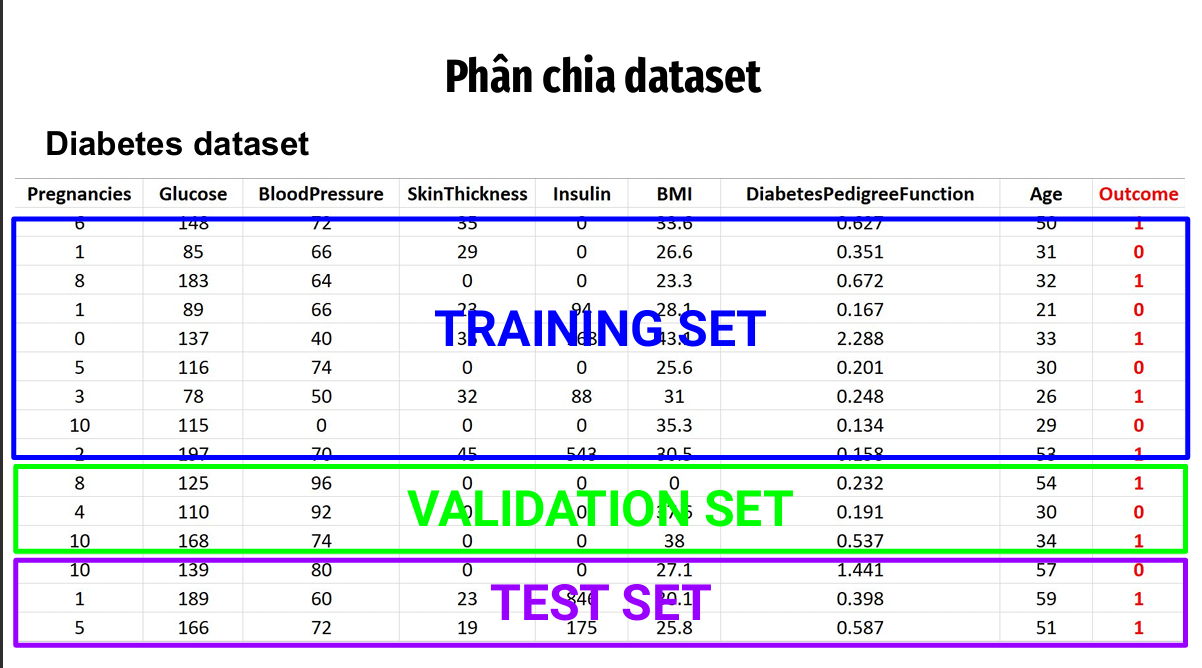

# Các bài toán trong supervised learning
- Bài toán Classification (bài toán phân loại )
  + Binary Classification
    - các dạng bài toán con hay gặp
      + fraud detection  - ktra giao dịch lừa đảo
      + Email spam detection - ktra email spam
      + Diagnostics -
  + Multiclass Classification - 1 đối tượng có nhiều label
    - các dạng bài toán con hay gặp - dưới đây là ví dụ về bài toán phân biệt đối tượng
      + Animals (cat / dog /horse)
      + Fruits (apple / orrange / lemon)
      + Flowers (rose / daisy / sunflower)

- Bài toán regression (bài toán hồi quy) - dự đoán giá trị trên 1 cái dải liên tục
  + các dạng bài toán con hay gặp
    + House price estimation
    + Stock prediction
    + temperature forecast
  
- ví dụ cho binary classification
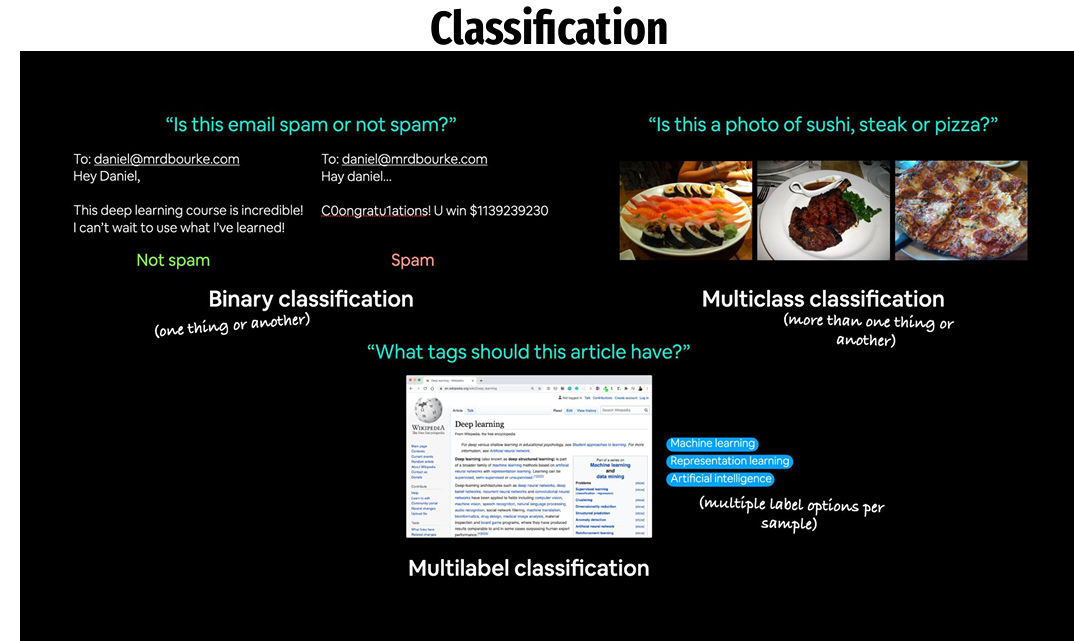

# Thảo luận về cách training model phân biệt chó mèo
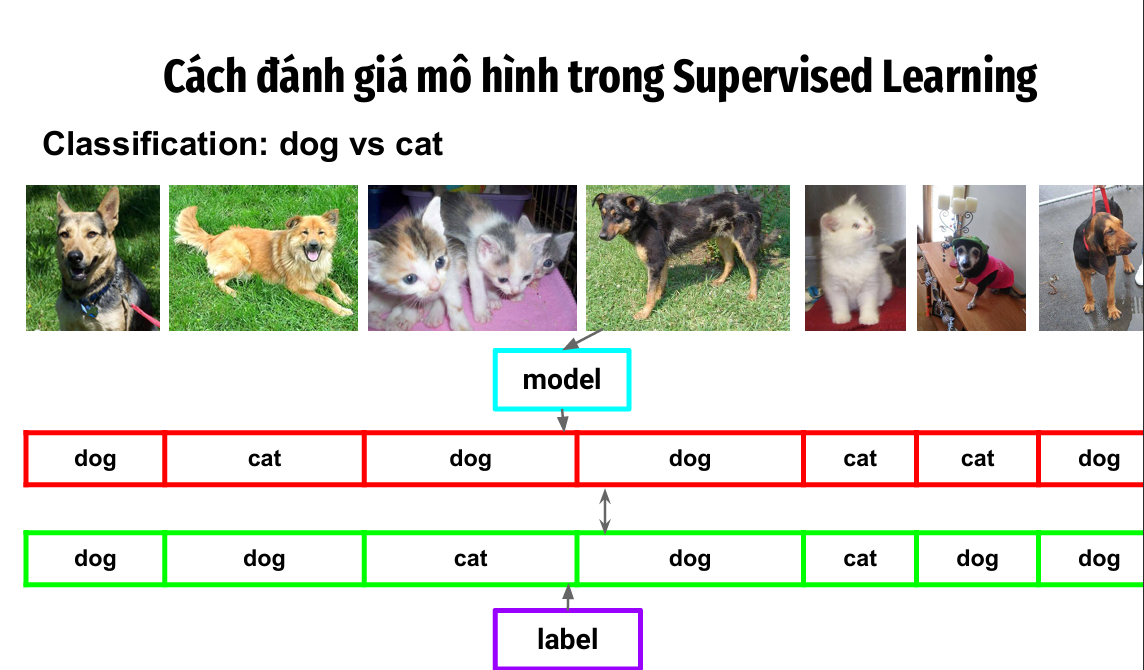

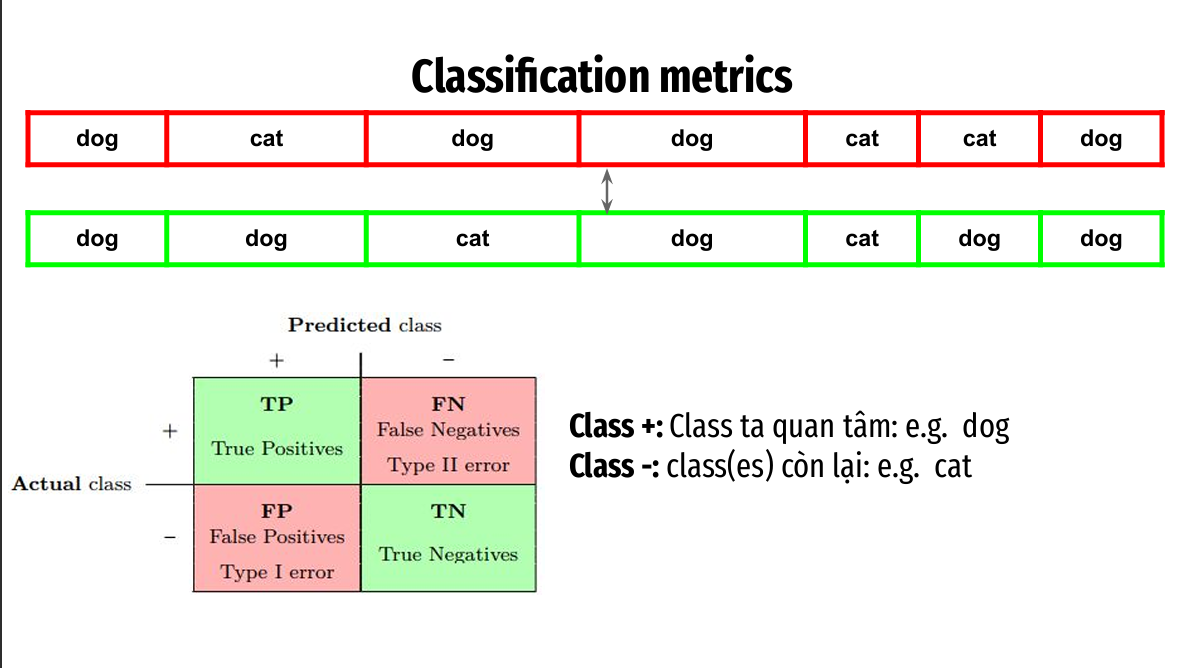

- hàng sẽ là các label kết quả
- cột là các prediction
- ở đây dự đoán sẽ rơi vào 1 trong 4 trường hợp như trong ảnh
  + ví dụ bạn chọn ở đây positive là con chó , negatives là con mèo
  + Trường hợp TP : True Positive - trường hợp prediction và label trùng nhau và có kết quả cùng là positive
  + Trường hợp FN : False Negative - trường hợp prediction đưa ra dự đoán sai là positive và label của nó lại là Negative
  + Trường hợp FP : False Positive - trường hợp prediction đưa ra dự đoán sai là negative và label của nó lại là positive
  + Trường hợp TN : True Negative - trường hợp prediction và label trùng nhau và có kết quả cùng là negative


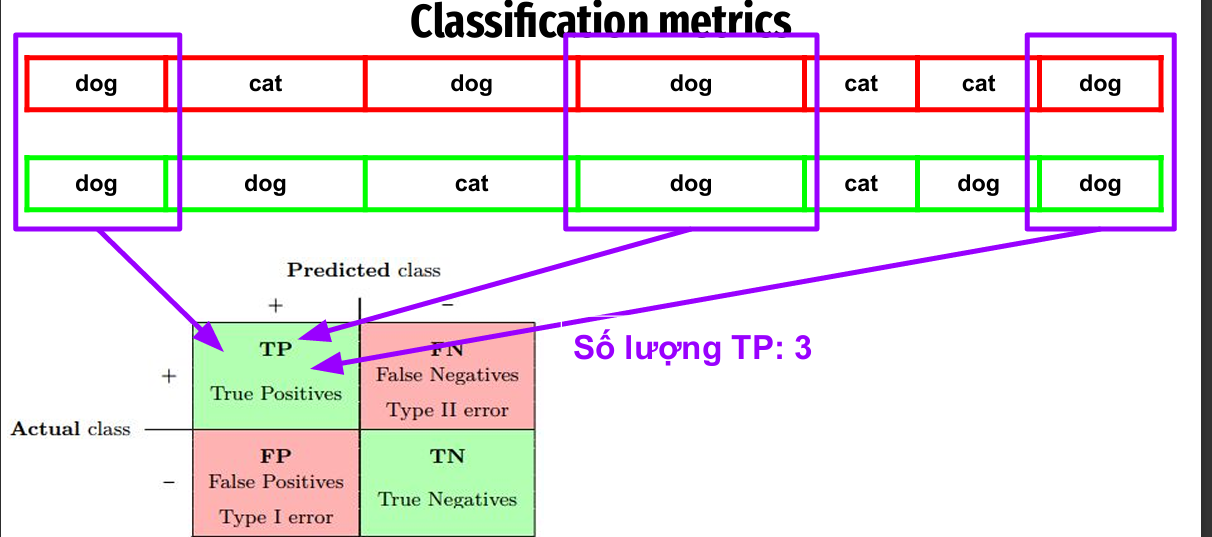

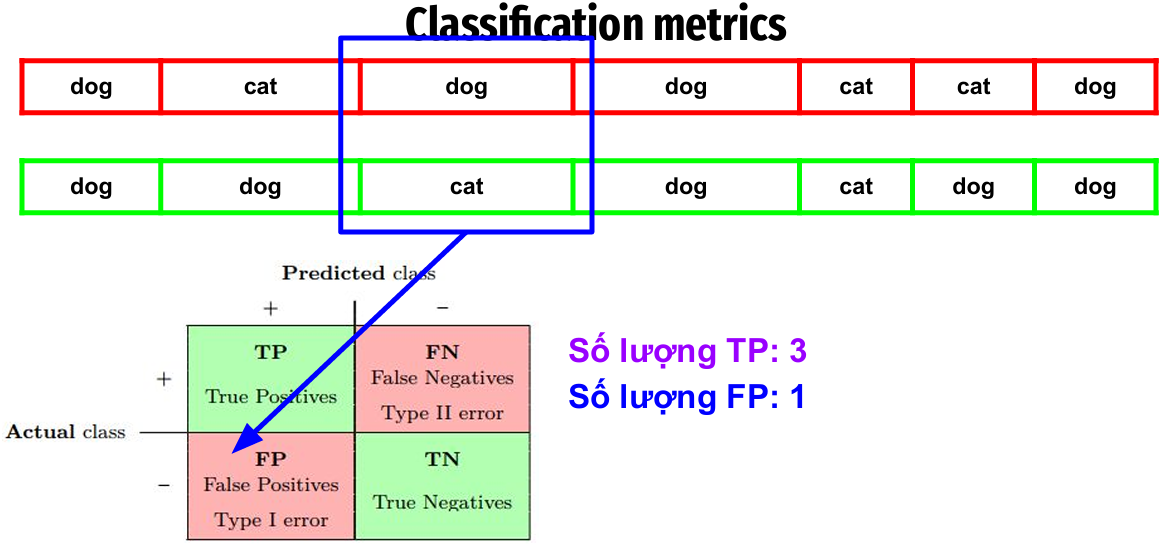

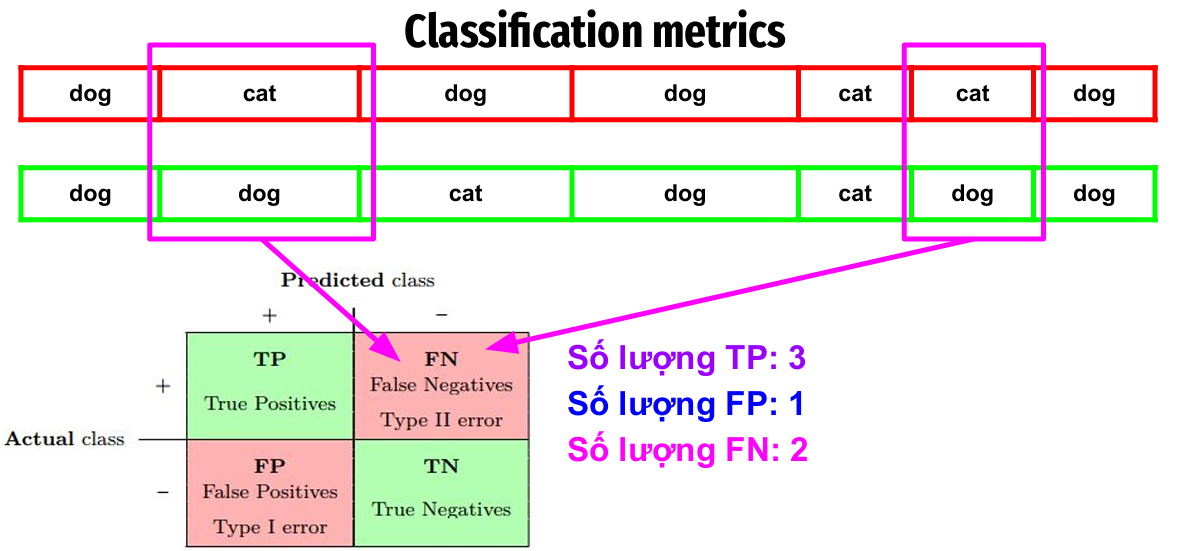


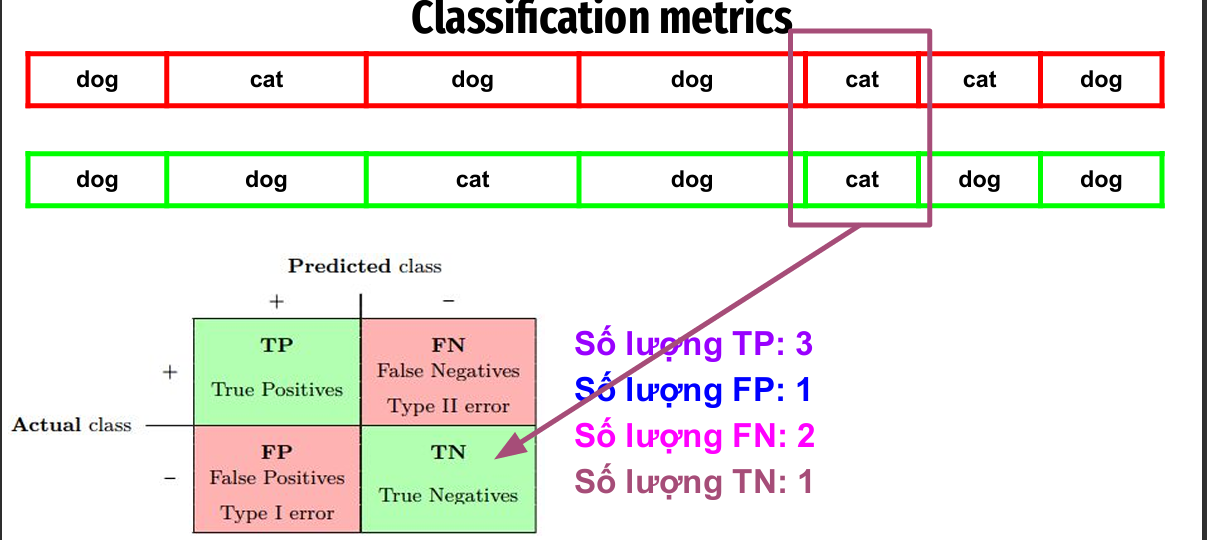

#Một số công thức tính toán cần thiết

- Accuracy : tính độ chính xác tổng quát
- Precision : tính độ chính xác đối với class+ (tính những cái positive) - ở đây có 4 lần đưa ra dự đoán dog (prediction) và có 3 lần dự đoán đúng
- Recall : Tính độ bao phủ đối với các dự đoán về class+ (có 5 label dog và bạn prediction ra 3 con)
- F1 score : Tính trung bình điều hòa giữa Precision và Recall

- Accuracy thì có thể dùng chung cho nhiều lần tính còn Precision , Recall và F1 score thì bạn phải tính lại sau mỗi lần

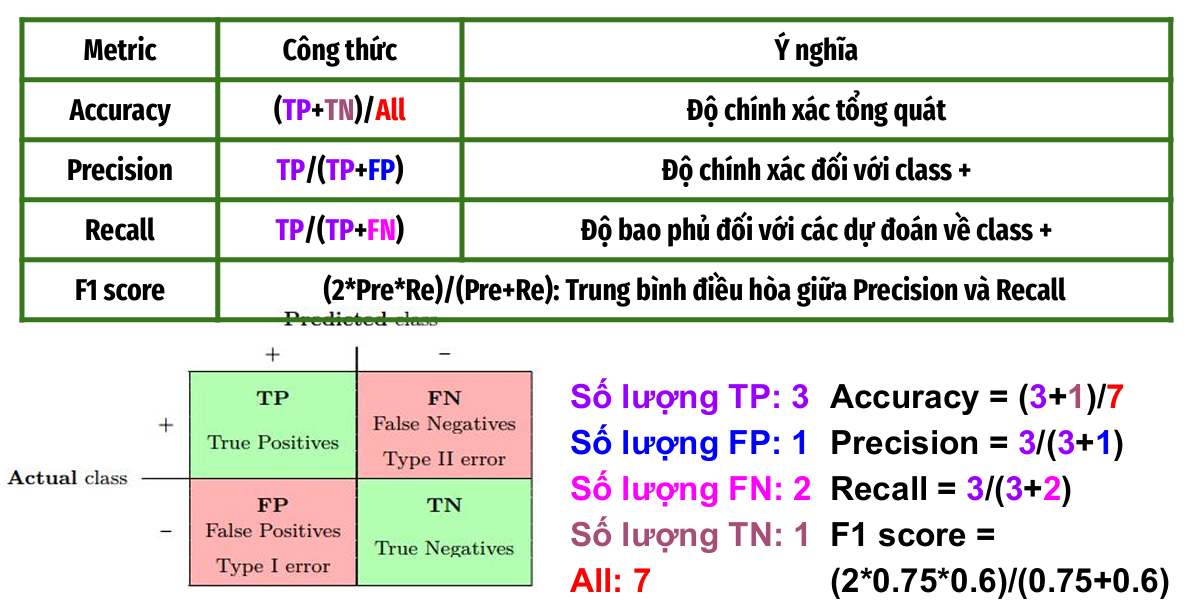

- Câu hỏi :    
  + ví dụ bạn đang tính rủ ny đi ăn , bạn có 1 danh sách quán ăn thì bạn nên chú trọng vào recall hay precision
  + trả lời : quán nào bạn cho vào list đó chắc chắn nó phải đúng và ngon nên ở đây cần precision - hay độ chính xác
  (chứ sẽ không cần đến độ bao phủ - recall)
  + bạn sẽ cần recall khi bạn làm du lịch chẳng hạn - khi khách đi đến đâu bạn cũng sẽ phải có danh sách quán ăn ở đó - nó sẽ cần độ bao phủ (recall) or ví dụ khi đợt dịch thì bắt cả f1 , f2, f3, f4

  - Thường trong lĩnh vực y tế bạn sẽ cần recall
  - và trong thực tế bạn sẽ phải quyết định dùng 1 trong 2 là precision or recall , lúc nào đau đầu khó xác định quá thì bạn có thể dùng f1 score

# Bổ xung thêm 2 công thức mới
- 2 Chỉ số True Positive Rate (=Recall - được dùng làm trục tung) và False Positive Rate (được dùng làm trục hoành) sẽ cùng tăng or cùng giảm
- Đường cong ROC (Receiver Operating Characteristic curve ) - đường cong ROC thể hiện mức độ cùng thay đổi của cả True Positive Rate và False Positive Rate

- 1 mô hình perfect là 1 mô hình mà đường ROC đi qua điểm perfect classifier kia . Tại vì True Positive là tối đa còn False Positive là tối thiểu và điểm Perfect classifier kia là điểm ở vị trí mà true positive là tối đa còn false positive là tối thiểu

- Nếu cùng có 2 model thì bạn buộc phải tính phần Area under the ROC curve để xem model nào tốt hơn nếu như khi vẽ đường tròn từ điểm perfect classifier đến ROC của chúng bằng nhau

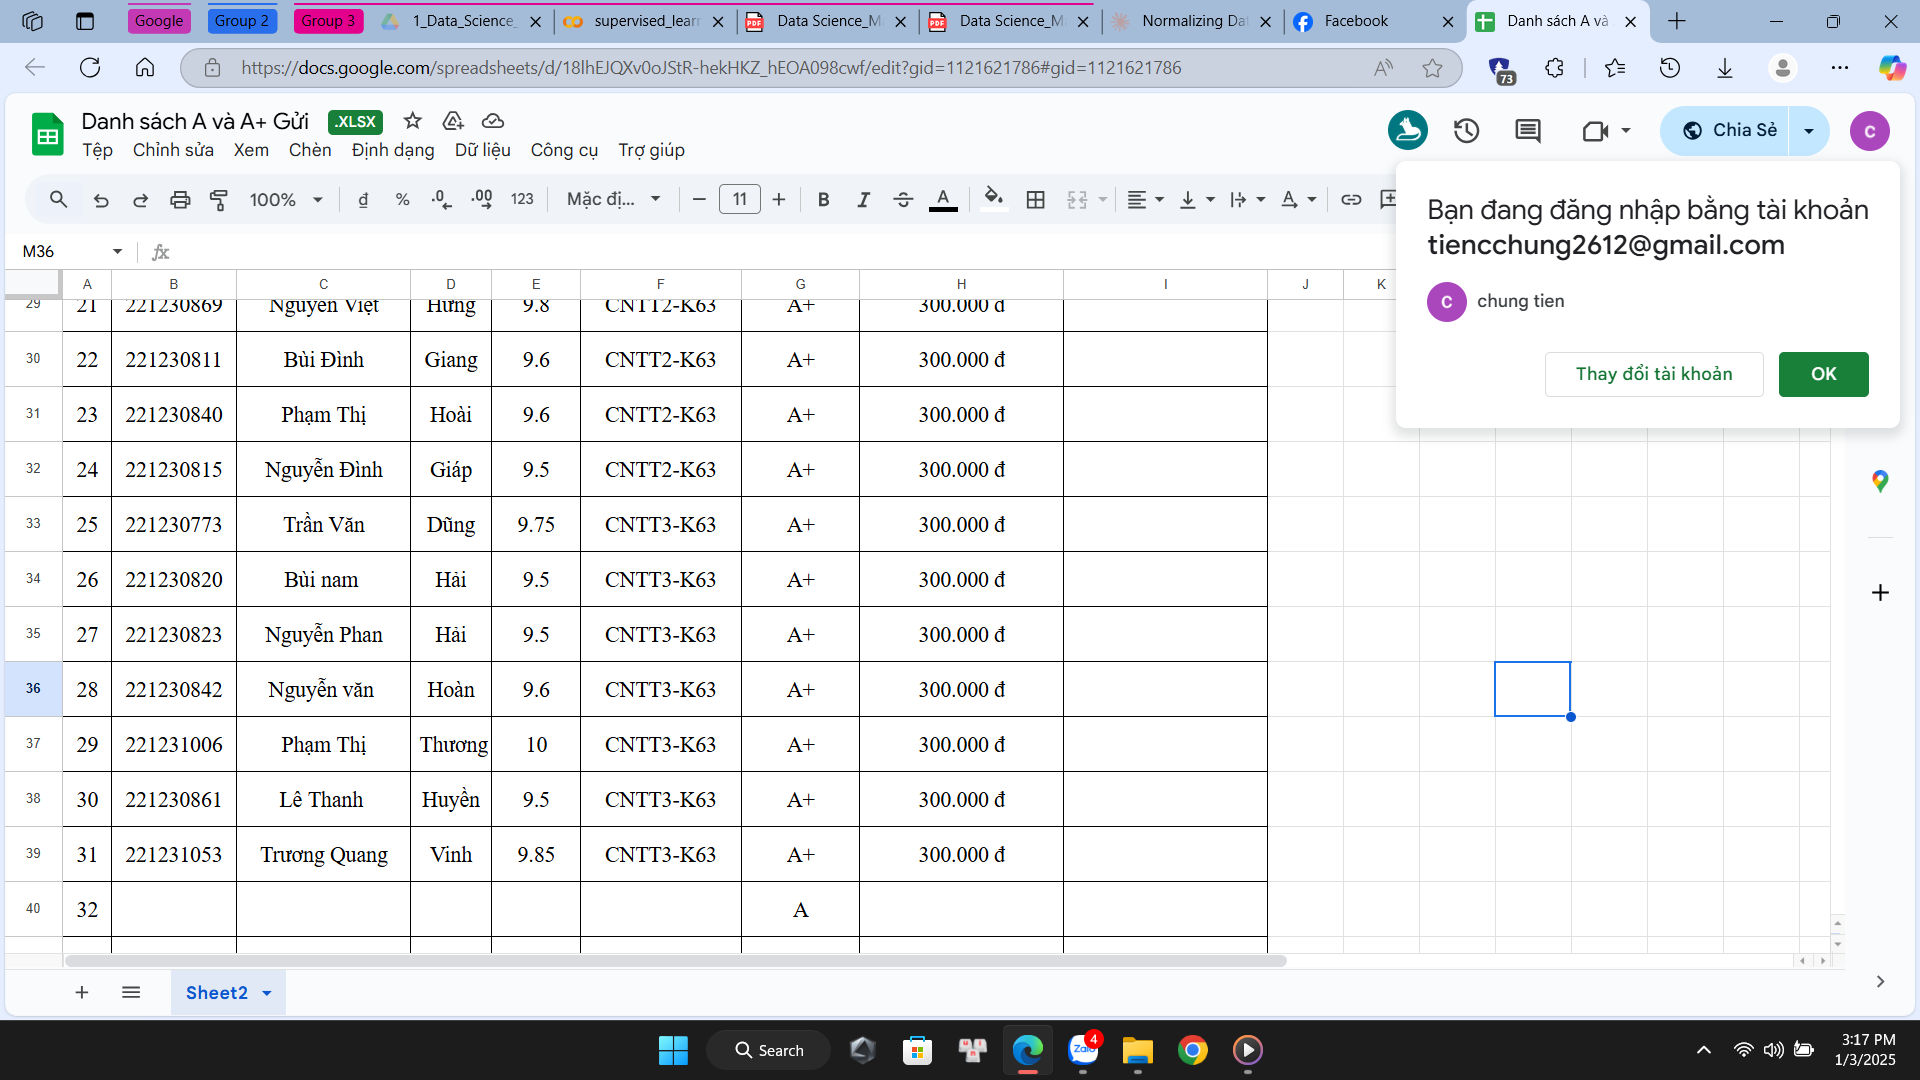

# Đối với bài toán Regression
- Bạn sẽ có 2 tham số
  + Mean absolute error
  + Root mean squared error (RMSE)
  + chúng cùng so sánh sự sai số giữa predict và actual (label) , các giá trị này càng nhỏ thì càng tốt
  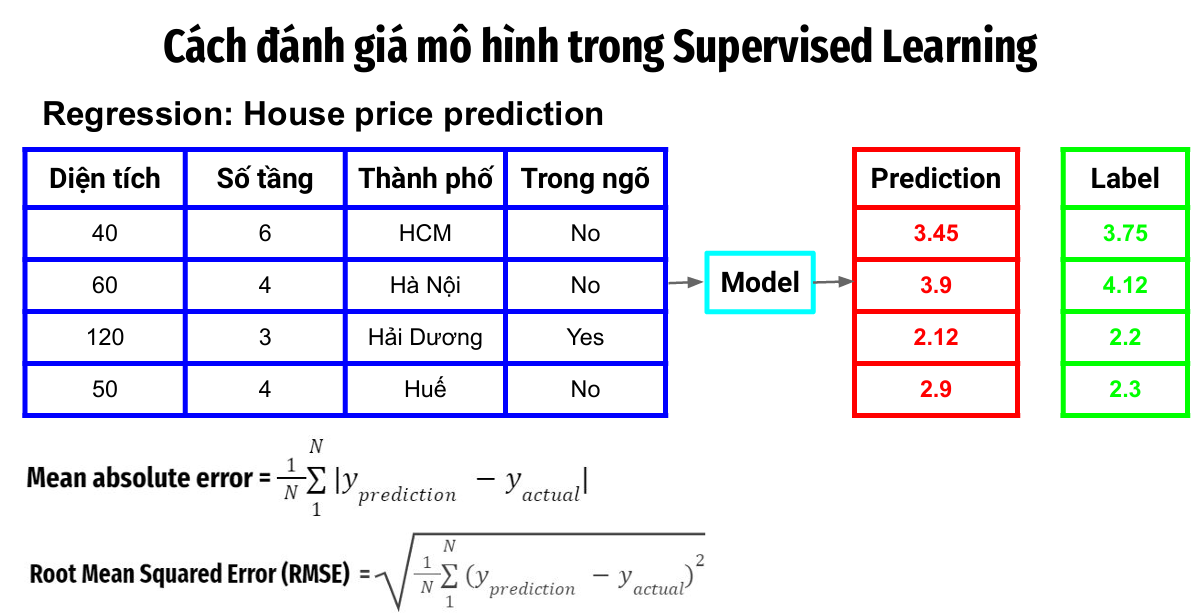